### Visualizing functions
It is helpful to visualize solutions of partial differential equations to gain insight into their behavior and develop intuition. Being able to differentiate between the profiles and shapes of solutions to different PDEs is also useful when we want to identify appropriate models from experimental data and observations. Our first step is to define the functions we want to visualize. When studying PDEs, we often consider functions of space and time. To keep things simple, all of our functions in this module will be formulated in terms of one spatial dimension $x$ and one temporal dimension $t$. The function $u(x,t)$ we want to visualize represents the value of the solution at location $x$ and time $t$, corresponding, for instance, to the displacement of water or the temperature of a metal rod.

We now import the required Python modules and define the function `VisualizeFunction` which will visualize a given function.

In [1]:
%matplotlib widget

## Importing necessary libraries
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import matplotlib.animation as animation 
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from math import pi, exp, cos, sin

## Define the function that visualizes a given function
def VisualizeFunction(outputs, x_domain, t_domain):
    x_vals = np.linspace(x_domain[0], x_domain[1], len(outputs[0]))
    t_vals = np.linspace(t_domain[0], t_domain[1], len(outputs))
    X,Y = np.meshgrid(x_vals,t_vals)

    fig = plt.figure(figsize=(7, 3))
    ax0 = fig.add_subplot(121, projection='3d')
    ax0.set_xlabel('Space x')
    ax0.set_ylabel('Time t')
    ax0.set_zlabel('Solution U')
    ax0.plot_surface(X,Y,outputs,cmap='RdBu')
    ax1 = fig.add_subplot(122)
    img = ax1.imshow(outputs, cmap='Blues', aspect='auto', origin='lower',
              interpolation='bilinear',
              extent=[x_domain[0], x_domain[1], t_domain[0], t_domain[1]])
    ax1.set_xlabel('Space x')
    ax1.set_ylabel('Time t')
    fig.colorbar(img, ax=ax1)
    plt.tight_layout()
    plt.show()

Next, we define a sample function $u(x,t)$ using its mathematical expression. 

In [2]:
## We define the variables x and t
x = sp.symbols ('x')
t = sp.symbols ('t')

## We define the function U(x,t)=t*sin(x) for (x,t) in (-10,10)x(0,8)
U = t*sp.sin(x-t)
x_domain = (-10,10)
t_domain = (0,8)

## Next, we calculate the values of the function on a space-time grid
U = sp.lambdify((x,t), U, modules=['numpy'])

xVals = np.linspace(x_domain[0], x_domain[1], 1000)
tVals = np.linspace(t_domain[0], t_domain[1], 1000)
X,T = np.meshgrid(xVals, tVals)
outputs = U(X,T)

xVals = np.linspace(x_domain[0], x_domain[1], 1000)
tVals = np.linspace(t_domain[0], t_domain[1], 500)
X,T = np.meshgrid(xVals, tVals)
outputsMovie = U(X,T)

### Visualizing functions as surface and contour graphs
We now visualize our function as a surface plot (left) and a contour graph (right). You can drag your mouse around in the surface graph to view the grapoh from different view angles! 

<IPython.core.display.Javascript object>


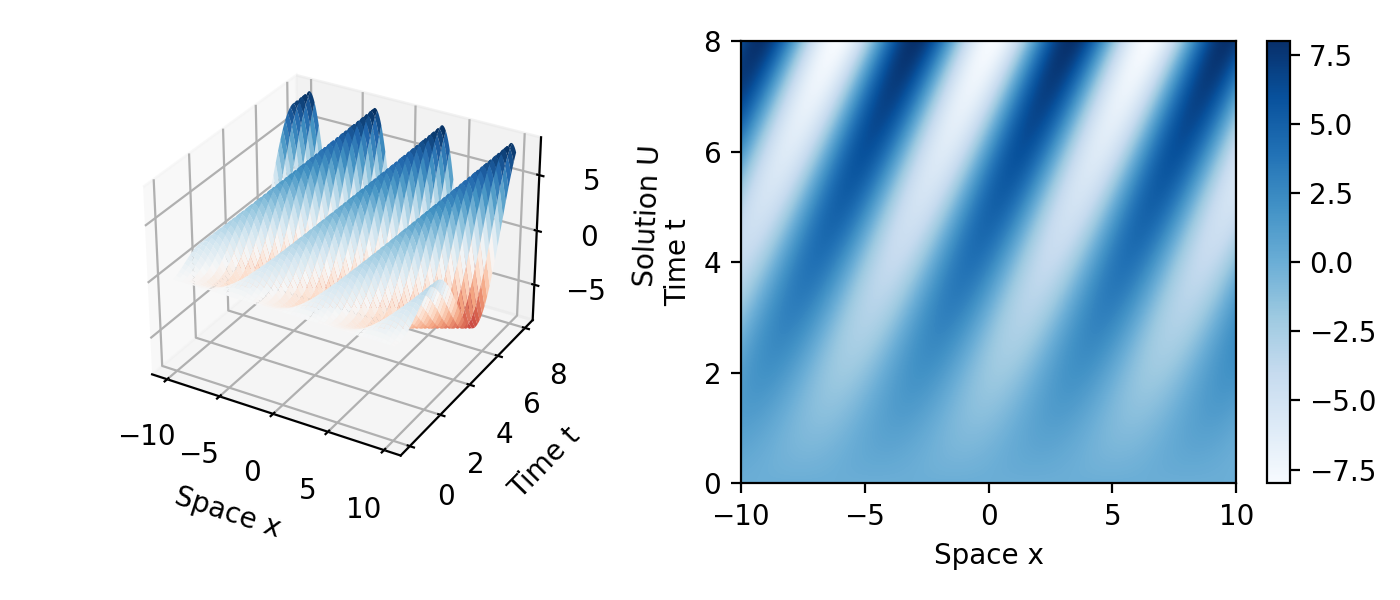

In [3]:
VisualizeFunction(outputs, x_domain, t_domain)

### Visualizing functions as animations
Next, we visualize a function $u(x,t)$ by animating its graph as a function of $x$ as the time variable $t$ changes.

<IPython.core.display.Javascript object>


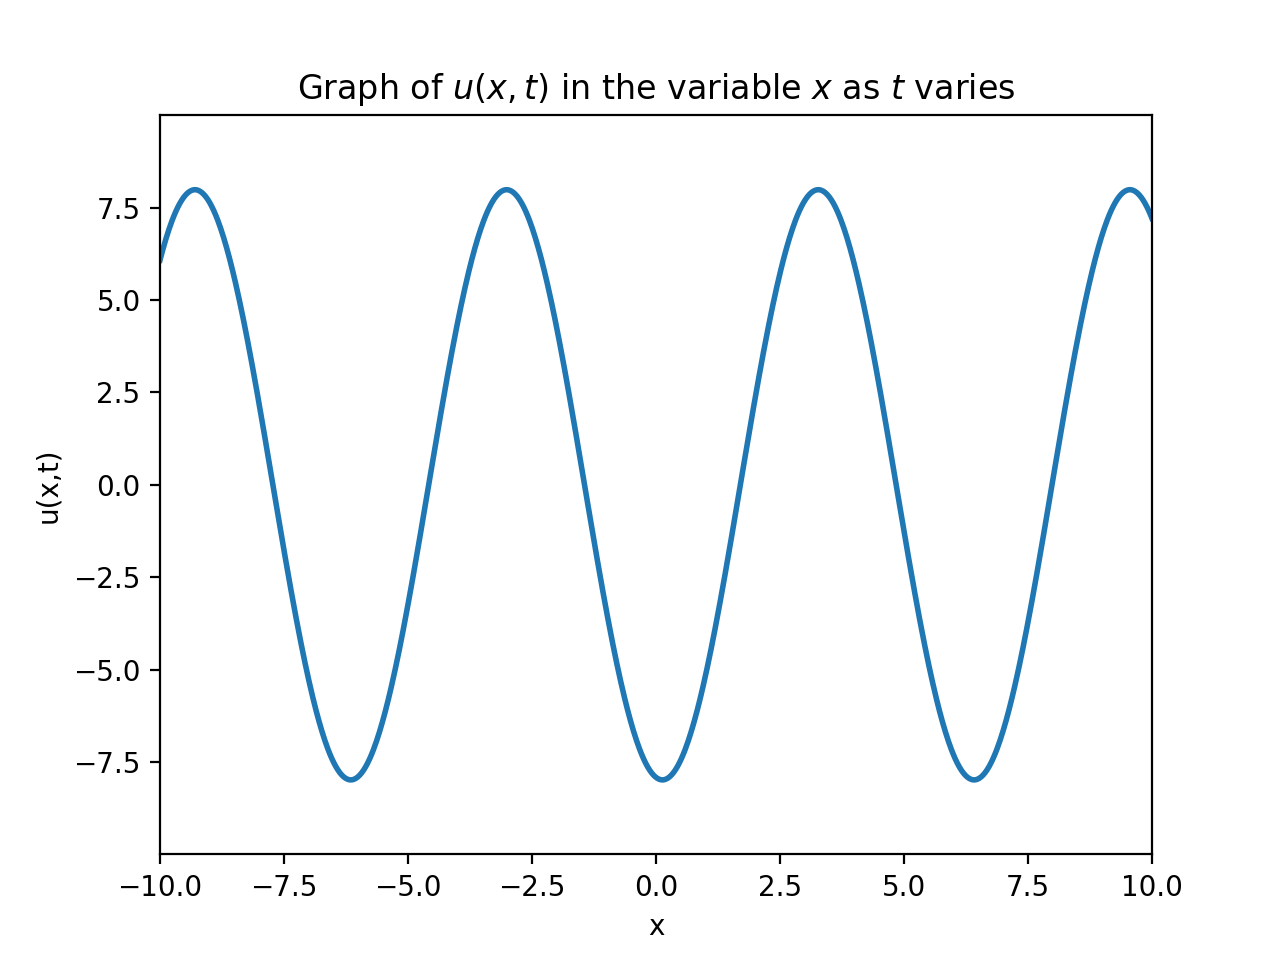

In [15]:
## Plotting the function using a movie
outputs = outputsMovie

fig = plt.figure()
ax = plt.axes(xlim = x_domain, ylim= (-np.max(outputs)*1.25, np.max(outputs)*1.25))
ax.set_xlabel('x')
ax.set_ylabel('u(x,t)')
ax.set_title('Graph of $u(x,t)$ in the variable $x$ as $t$ varies')
line, = ax.plot([], [], linewidth=2)

def animate(t):
    x = np.linspace(x_domain[0],x_domain[1],len(outputs[0]))
    y = outputs[t]
    line.set_data(x, y)

anim = animation.FuncAnimation(fig, animate, frames=len(outputs)-1,
                               interval=10, repeat=False)
plt.show()